In [7]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In [8]:
conf = Configuration('confMNPoolWithRenshawCells.rmto')
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [9]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [10]:
pools = []
pools.append(MotorUnitPool(conf, 'SOL'))
pools.append(NeuralTract(conf, 'CM_ext'))
pools.append(InterneuronPool(conf, 'RC'))

Syn = SynapsesFactory(conf, pools)

Motor Unit Pool SOL built
Descending Command CM_ext built
Interneuron Pool of RC built
Synaptic Noise on RC built
All the 124791 synapses were built


In [11]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    pools[1].atualizePool(t[i]) # NeuralTract
    pools[0].atualizeMotorUnitPool(t[i]) # MN pool
    pools[3].atualizePool(t[i]) # RC synaptic Noise
    pools[2].atualizeInterneuronPool(t[i]) # RC pool
toc = time.clock()
print str(toc - tic) + ' seconds'

25546.872387 seconds


In [12]:
pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()

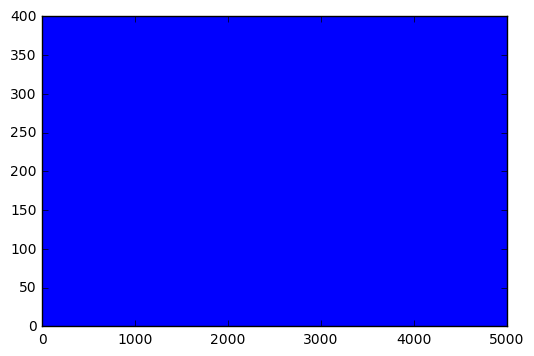

In [13]:
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[:, 0],
         pools[1].poolTerminalSpikes[:, 1]+1, '.')

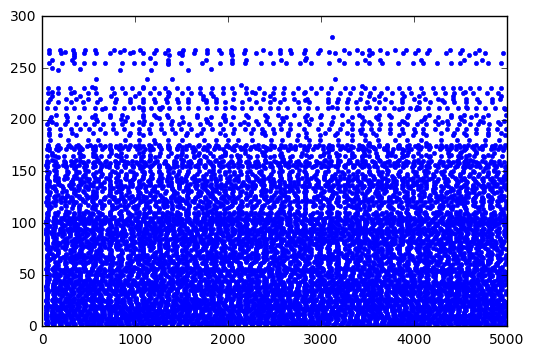

In [14]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')

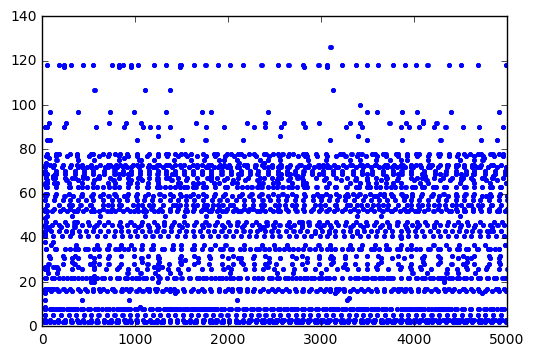

In [15]:
plt.figure()
plt.plot(pools[2].poolSomaSpikes[:, 0],
         pools[2].poolSomaSpikes[:, 1]+1, '.')

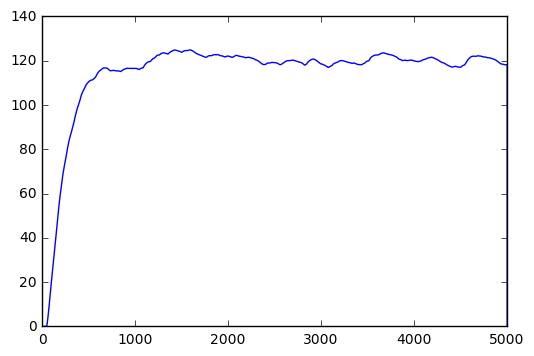

In [17]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')